In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sainandagopal","key":"831cf3469eeb5cc4eaf476f6d2328541"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!unzip /content/Genetic.zip

Archive:  /content/Genetic.zip
  inflating: Medicine_Details.csv    


In [ ]:
df = pd.read_csv('/content/Medicine_Details.csv')

In [ ]:
df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [ ]:
df.tail()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
11820,Zilarta-CT 40/6.25 Tablet,Azilsartan medoxomil (40mg) + Chlorthalidone (...,Hypertension (high blood pressure),Dizziness Tiredness Decreased potassium level ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Micro Labs Ltd,67,33,0
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Lifeline Remedies India Pvt Ltd,0,80,20
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",TBG pharma ltd,25,75,0
11823,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100
11824,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100


In [ ]:
df.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11825.000000,11825.000000,11825.000000
mean,38.516025,35.756364,25.727611
std,25.225343,18.268134,23.991985
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB


In [ ]:
df.columns

Index(['Medicine Name', 'Composition', 'Uses', 'Side_effects', 'Image URL',
       'Manufacturer', 'Excellent Review %', 'Average Review %',
       'Poor Review %'],
      dtype='object')

In [ ]:
df.isnull().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

In [ ]:
df.duplicated().sum()


84

In [ ]:
clean_df = df.drop_duplicates()

In [ ]:
clean_df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [ ]:
composition_value_counts = clean_df['Composition'].value_counts()
composition_value_counts

Composition
Luliconazole (1% w/w)                                                                                   98
Levocetirizine (5mg) + Montelukast (10mg)                                                               76
Ketoconazole (2% w/w)                                                                                   61
Domperidone (30mg) + Rabeprazole (20mg)                                                                 59
Itraconazole (100mg)                                                                                    53
                                                                                                        ..
Digoxin (0.25mg)                                                                                         1
Sulphacetamide (20% w/v)                                                                                 1
Furosemide (10mg/ml)                                                                                     1
Chloroquine (500mg)      

In [ ]:
composition_names = composition_value_counts.index.tolist()
salts_name = composition_names[:30]
salts_name

['Luliconazole (1% w/w)',
 'Levocetirizine (5mg) + Montelukast (10mg)',
 'Ketoconazole (2% w/w)',
 'Domperidone (30mg) + Rabeprazole (20mg)',
 'Itraconazole (100mg)',
 'Telmisartan (40mg)',
 'Itraconazole (200mg)',
 'Domperidone (30mg) + Pantoprazole (40mg)',
 'Telmisartan (40mg) + Amlodipine (5mg)',
 'Glimepiride (2mg) + Metformin (500mg)',
 'Metformin (500mg)',
 'Minoxidil (5% w/v)',
 'Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v)',
 'Amoxycillin  (500mg) +  Clavulanic Acid (125mg)',
 'Rabeprazole (20mg)',
 'Levocetirizine (5mg)',
 'Glimepiride (2mg) + Metformin (500mg) + Pioglitazone (15mg)',
 'Teneligliptin (20mg)',
 'Methylcobalamin (750mcg) + Pregabalin (75mg)',
 'Carboxymethylcellulose (0.5% w/v)',
 'Terbinafine (1% w/w)',
 'Glimepiride (2mg) + Metformin (500mg) + Voglibose (0.2mg)',
 'Pantoprazole (40mg)',
 'Montelukast (10mg) + Fexofenadine (120mg)',
 'Metformin (500mg) + Teneligliptin (20mg)',
 'Telmisartan (40mg) + Hydrochlorothiazide (12.5mg)',
 'Glimepiride (1mg) + Metf

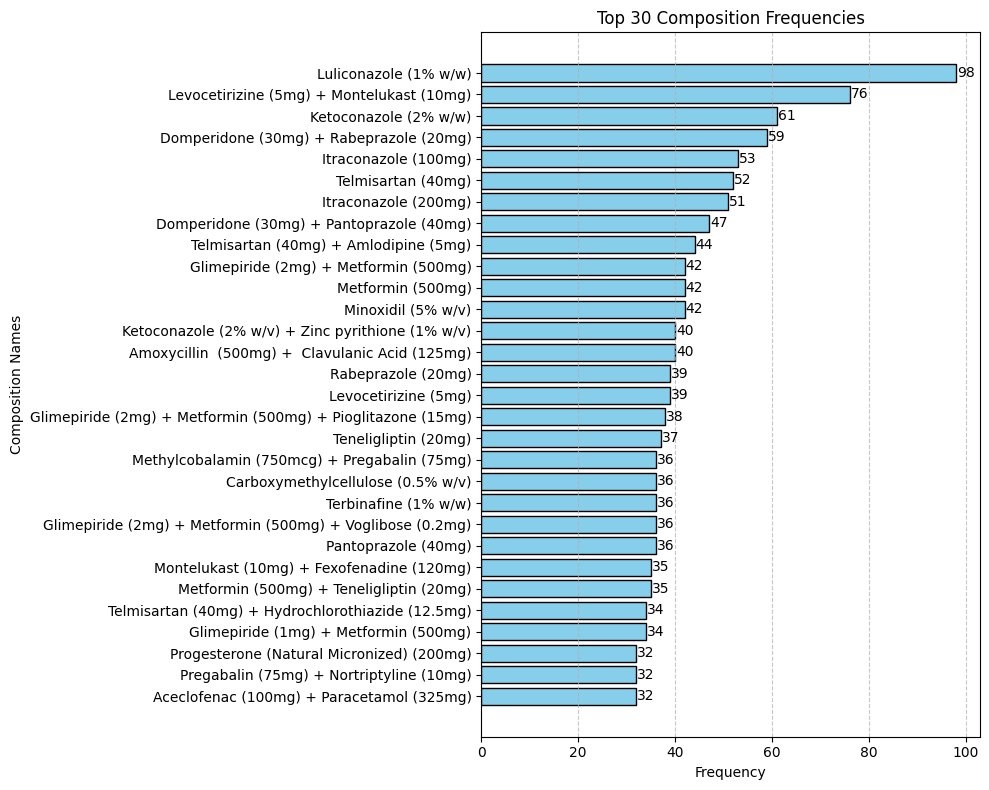

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'salts_name' contains the top 30 composition names
# Replace 'salts_name' with your list of compositions

# Generate frequencies for each composition name
frequencies = [clean_df['Composition'].value_counts()[name] for name in salts_name]

# Create a bar plot with customizations
plt.figure(figsize=(10, 8))
plt.barh(salts_name, frequencies, color='skyblue', edgecolor='black')

plt.xlabel('Frequency')
plt.ylabel('Composition Names')
plt.title('Top 30 Composition Frequencies')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent at the top

# Add frequency values as text on the bars
for i, v in enumerate(frequencies):
    plt.text(v + 0.2, i, str(v), color='black', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
side_effects_counts = clean_df['Side_effects'].value_counts()

# Create a dictionary to store medicines for each side effect
side_effects_medicines = {}

# Loop through unique side effects and collect associated medicines
for side_effect, count in side_effects_counts.items():
    # Filter DataFrame for each unique side effect
    medicines_for_side_effect = clean_df.loc[clean_df['Side_effects'] == side_effect, 'Medicine Name'].tolist()

    # Store the list of medicines for the side effect in the dictionary
    side_effects_medicines[side_effect] = medicines_for_side_effect

# Loop through the top 10 side effects and print their information
for idx, (side_effect, medicines) in enumerate(side_effects_medicines.items()):
    if idx >= 10:
        break  # Exit loop after printing 10 occurrences

    print(f"Side Effect: {side_effect}")
    print(f"Number of Occurrences: {side_effects_counts[side_effect]}")
    print(f"Medicines: {medicines}")
    print("------------------------")

Side Effect: Application site reactions burning irritation itching and redness
Number of Occurrences: 389
Medicines: ['Anovate Cream', 'Aziderm 20% Cream', 'Acivir Cream', 'Aziderm 10% Cream', 'Aziderm 10% Gel', 'Acivir Cream', 'Aziderm 20% Gel', 'AF-K Lotion', 'Aziderm 15% Gel', 'Acetik-HC Ear Drop', 'Atrodex-C Eye Drop', 'Afderm-MN + Cream', 'Ara Eye Drop', 'Azifast Gel', 'Amfy Gel', 'Adgaba Gel', 'Azobril Cream', 'Azobril Forte 20% Cream', 'AF-K Lotion', 'Allyzole Shampoo', 'Anti Druf Lotion', 'Amfy Gel', 'Afitra Cream', 'Betadine 10% Solution', 'Betadine 10% Ointment', 'Betadine 2% Gargle Mint', 'Betadine Powder', 'Betadine 2% Gargle Mint', 'Betadine Vaginal Pessaries', 'Bactafuz Cream', 'Betadine 5% Ointment', 'Betakind Gargle', 'Betadine 10% Solution', 'Betadine 5% Ointment', 'Bionect Ointment', 'Betadine 7.5% Surgical Scrub', 'Betadine Surgical Scrub 7.5% Solution', 'Biospor 1% Cream', 'Danclear  Shampoo', 'Diprolite Cream', 'Diprobate S Plus Ointment', 'Danclear  Cream', 'Dencr

In [ ]:
# Get the value counts of uses
uses_counts = clean_df['Uses'].value_counts().head(10)

# Create a dictionary to store medicines for each use
uses_medicines = {}

# Loop through unique uses and collect associated medicines
for use, count in uses_counts.items():
    # Filter DataFrame for each unique use
    medicines_for_use = clean_df.loc[clean_df['Uses'] == use, 'Medicine Name'].tolist()

    # Store the list of medicines for the use in the dictionary
    uses_medicines[use] = medicines_for_use

# Display only the first 10 uses and their associated medicines
for idx, (use, medicines) in enumerate(uses_medicines.items()):
    if idx >= 10:
        break  # Exit loop after printing 10 occurrences

    print(f"Use: {use}")
    print(f"Number of Occurrences: {uses_counts[use]}")
    print(f"Medicines: {medicines}")
    print("------------------------")

Use: Treatment of Type 2 diabetes mellitus
Number of Occurrences: 904
Medicines: ['Amaryl 1mg Tablet', 'Ajaduo 25mg/5mg Tablet', 'Amaryl 2mg Tablet', 'Azulix 1 MF Tablet PR', 'Azulix 2 MF Tablet PR', 'Amaryl MV 2mg Tablet SR', 'Amaryl MV 1mg Tablet SR', 'Ajaduo 10mg/5mg Tablet', 'Amaryl M Forte 2mg Tablet PR', 'Amaryl M Forte 1mg Tablet PR', 'Azulix 1 Tablet', 'Azulix 2 MF Forte Tablet PR', 'Azulix 3 MF Tablet PR', 'Amaryl 3mg Tablet', 'Azulix 2 Tablet', 'Azulix 1 MF Forte Tablet PR', 'Aloja 25 Tablet', 'Azulix 4 MF Tablet PR', 'Azulix MV 2/0.2 Tablet SR', 'Azulix MV 2mg/500mg/0.3mg Tablet SR', 'Aim7 60 XR Tablet', 'Aplevant 0.75mg Pre-filled Pen', 'Azulix 4 MF Forte Tablet PR', 'Abvida 50mg Tablet', 'Azulix 0.5 MF Tablet PR', 'Azulix 3 Tablet', 'Azulix MV 1mg/500mg/0.3mg Tablet SR', 'Aloja 12.5 Tablet', 'Azulix 4 Tablet', 'Advog 0.3 Tablet', 'Acmeglim-MV 2 Tablet SR', 'Azukon Tablet', 'Advog 0.2 Tablet', 'Advog M 0.3 Plus Tablet', 'Abvida-M 50mg/1000mg Eazy Glide Tablet', 'Azmet-VG 1 

<ipython-input-29-d164a2bf809f>:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


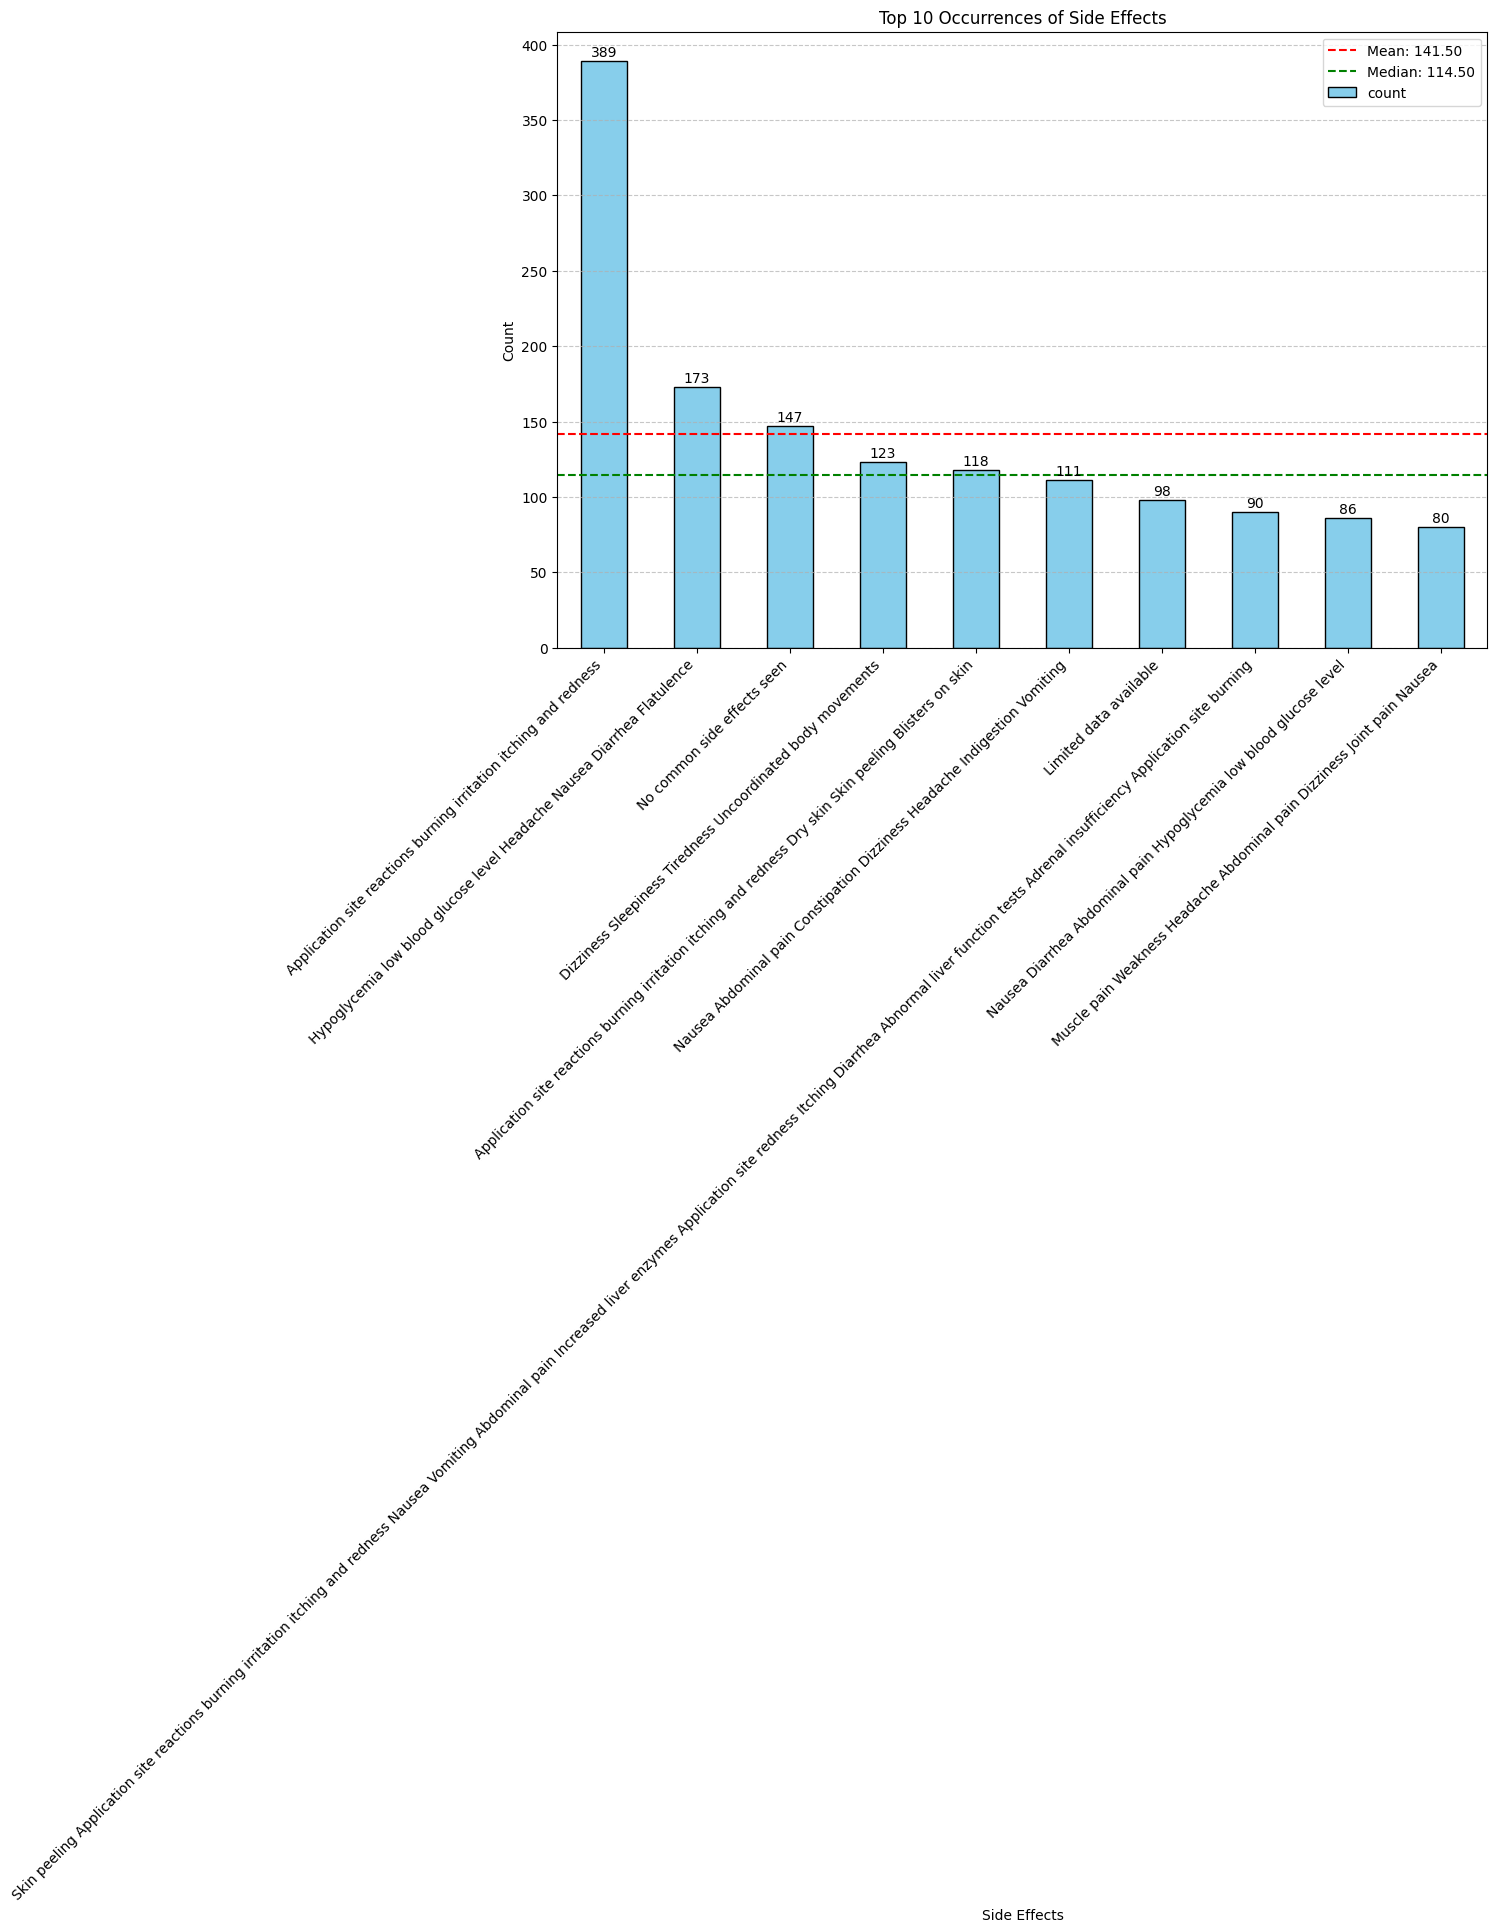

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'clean_df' contains the necessary data

# Get the value counts of side effects and limit to top 10
side_effects_counts = clean_df['Side_effects'].value_counts().head(10)

# Create a dictionary to store medicines for each side effect
side_effects_medicines = {}

# Loop through unique side effects and collect associated medicines
for side_effect in side_effects_counts.index:
    # Filter DataFrame for each unique side effect
    medicines_for_side_effect = clean_df.loc[clean_df['Side_effects'] == side_effect, 'Medicine Name'].tolist()

    # Store the list of medicines for the side effect in the dictionary
    side_effects_medicines[side_effect] = medicines_for_side_effect

# Create a bar chart of top 10 side effects and their counts with improved aesthetics
plt.figure(figsize=(12, 8))
bar_plot = side_effects_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding annotations for each bar with custom formatting
for i, count in enumerate(side_effects_counts):
    plt.text(i, count + 1, f'{count}', ha='center', va='bottom', fontsize=10)

# Draw a horizontal line for the mean count
mean_count = side_effects_counts.mean()
plt.axhline(mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')
plt.legend()

# Draw a horizontal line for the median count
median_count = side_effects_counts.median()
plt.axhline(median_count, color='green', linestyle="--", label=f'Median: {median_count:.2f}')
plt.legend()

plt.title('Top 10 Occurrences of Side Effects')
plt.xlabel('Side Effects')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

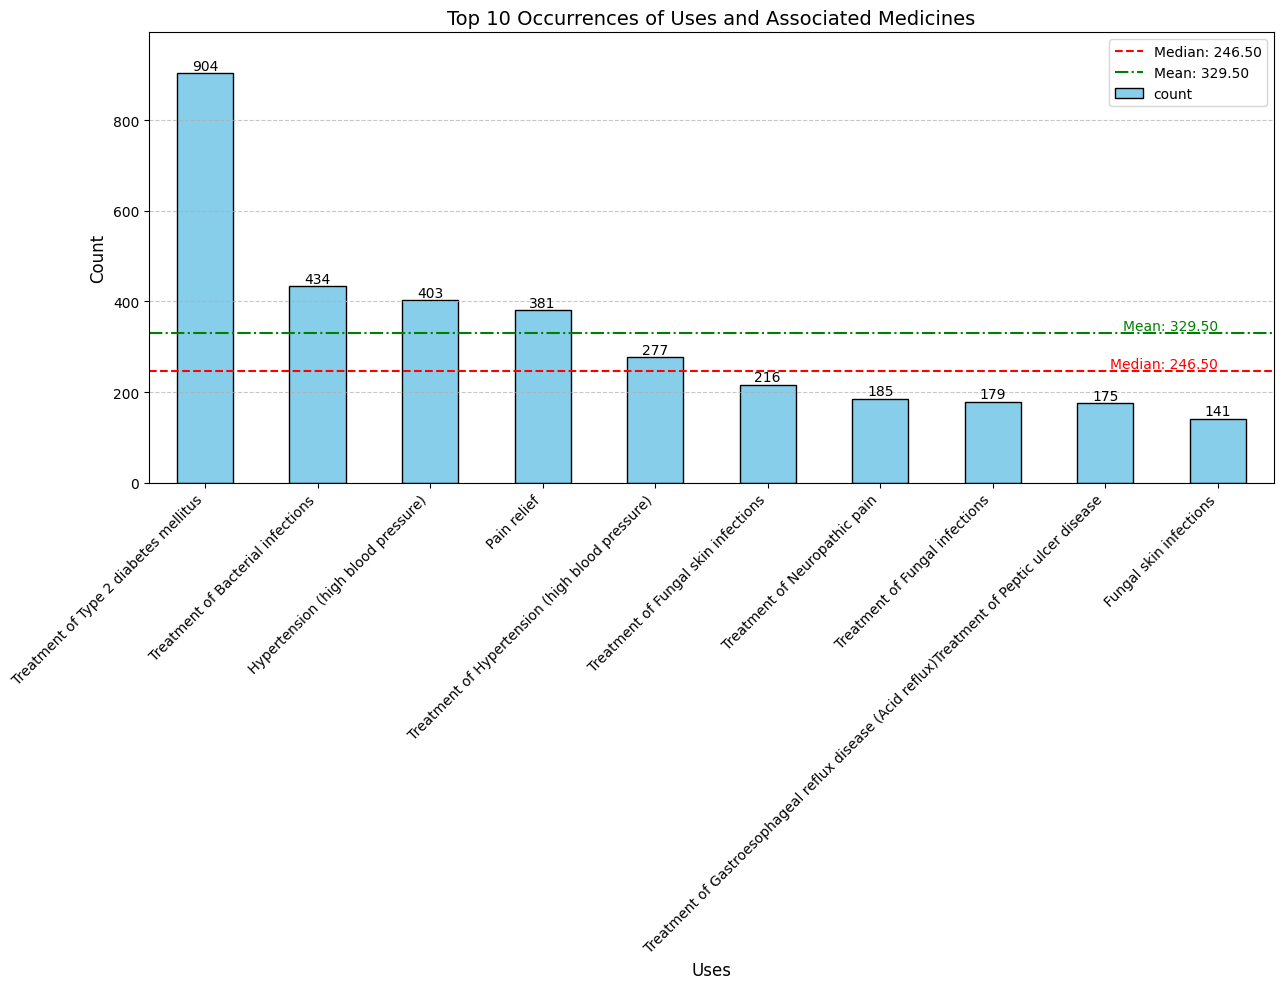

In [ ]:
top_10_uses = uses_counts.head(10)

# Calculate median and mean values
median_value = top_10_uses.median()
mean_value = top_10_uses.mean()

# Create a bar chart for top 10 uses and their occurrences
plt.figure(figsize=(13, 10))
bar_plot = top_10_uses.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding annotations for each bar
for i, count in enumerate(top_10_uses):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

# Plotting median line with annotation
plt.axhline(median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')
plt.text(len(top_10_uses) - 1, median_value, f'Median: {median_value:.2f}', color='red', va='bottom', ha='right', fontsize=10)

# Plotting mean line with annotation
plt.axhline(mean_value, color='green', linestyle='-.', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
plt.text(len(top_10_uses) - 1, mean_value, f'Mean: {mean_value:.2f}', color='green', va='bottom', ha='right', fontsize=10)

plt.title('Top 10 Occurrences of Uses and Associated Medicines', fontsize=14)
plt.xlabel('Uses', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, top_10_uses.max() * 1.1)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_uses = tfidf_vectorizer.fit_transform(clean_df['Uses'].astype(str))
tfidf_matrix_composition = tfidf_vectorizer.fit_transform(clean_df['Composition'].astype(str))
tfidf_matrix_side_effects = tfidf_vectorizer.fit_transform(clean_df['Side_effects'].astype(str))

In [ ]:
# Ensure all matrices have the same number of rows
min_rows = min(tfidf_matrix_uses.shape[0], tfidf_matrix_composition.shape[0], tfidf_matrix_side_effects.shape[0])

# Trim matrices to have the same number of rows
tfidf_matrix_uses = tfidf_matrix_uses[:min_rows]
tfidf_matrix_composition = tfidf_matrix_composition[:min_rows]
tfidf_matrix_side_effects = tfidf_matrix_side_effects[:min_rows]

In [ ]:
from scipy.sparse import hstack
# Combine the matrices horizontally
tfidf_matrix_combined = hstack((tfidf_matrix_uses, tfidf_matrix_composition, tfidf_matrix_side_effects))

tfidf_matrix_combined

<11741x3008 sparse matrix of type '<class 'numpy.float64'>'
	with 228599 stored elements in Compressed Sparse Row format>

In [ ]:
cosine_sim_combined = cosine_similarity(tfidf_matrix_combined, tfidf_matrix_combined)
cosine_sim_combined

array([[1.        , 0.        , 0.01533593, ..., 0.05146093, 0.02642958,
        0.        ],
       [0.        , 1.        , 0.44631417, ..., 0.01307189, 0.02181966,
        0.02340439],
       [0.01533593, 0.44631417, 1.        , ..., 0.00976893, 0.04480567,
        0.02340439],
       ...,
       [0.05146093, 0.01307189, 0.00976893, ..., 1.        , 0.12351656,
        0.        ],
       [0.02642958, 0.02181966, 0.04480567, ..., 0.12351656, 1.        ,
        0.01227982],
       [0.        , 0.02340439, 0.02340439, ..., 0.        , 0.01227982,
        1.        ]])

In [ ]:
def recommend_medicines_by_usage(medicine_name, tfidf_matrix_uses, clean_df):
    # Get the index of the medicine
    medicine_index = clean_df[clean_df['Medicine Name'] == medicine_name].index[0]

    # Calculate cosine similarity between the given medicine and others based on usage
    sim_scores = cosine_similarity(tfidf_matrix_uses, tfidf_matrix_uses[medicine_index])

    # Get indices of top similar medicines (excluding the queried one)
    sim_scores = sim_scores.flatten()
    similar_indices = sim_scores.argsort()[::-1][1:6]  # Top 5 similar medicines

    # Get recommended medicine names
    recommended_medicines = clean_df.iloc[similar_indices]['Medicine Name'].tolist()

    return recommended_medicines

In [ ]:
query = "Lobet 20mg Injection"
recommended_medicines = recommend_medicines_by_usage(query, tfidf_matrix_uses, clean_df)
print(recommended_medicines)

['Lubrijoint 500 Tablet', 'Ostogard Gm Tablet', 'Lubricart-D Tablet', 'Arthocerin-DG Tablet', 'Orcerin Capsule']


In [ ]:
def recommend_medicines_by_symptoms(symptoms, tfidf_vectorizer, tfidf_matrix_uses, clean_df):
    # Create a string from the given symptoms
    symptom_str = ' '.join(symptoms)

    # Transform the symptom string using the TF-IDF vectorizer
    symptom_vector = tfidf_vectorizer.transform([symptom_str])

    # Calculate cosine similarity between the symptom vector and all medicine vectors
    sim_scores = cosine_similarity(tfidf_matrix_uses, symptom_vector)

    # Get indices of top similar medicines
    sim_scores = sim_scores.flatten()
    similar_indices = sim_scores.argsort()[::-1][:5]  # Top 5 similar medicines

    # Get recommended medicine names
    recommended_medicines = clean_df.iloc[similar_indices]['Medicine Name'].tolist()

    return recommended_medicines

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer for symptoms
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the 'Uses' column to create the TF-IDF matrix for symptoms
tfidf_matrix_uses = tfidf.fit_transform(clean_df['Uses'])

# Now, you can call the recommend_medicines_by_symptoms function
query = ["Diabetes"]  # Convert the single symptom to a list
recommended_medicines = recommend_medicines_by_symptoms(query, tfidf, tfidf_matrix_uses, clean_df)
print(recommended_medicines)

['Lantus 100IU/ml Solution for Injection', 'Toujeo 300 U/mL Solostar', 'Wosulin-R 40IU/ml Injection', 'Mixtard 30 HM 100IU/ml Penfill', 'Wosulin 30/70 40IU/ml Injection']
